# SET UP

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Lade nötiges Paket: tidyverse


# Load the Data

In [98]:
%%R


df <- read_csv('cleaned_output.csv')

Rows: 11980 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): University, Department, Academic Year, Field, School
dbl (2): Overall Pay, LW Ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [99]:
%%R

df

# A tibble: 11,980 × 7
   University   Department `Overall Pay` `LW Ratio` `Academic Year` Field School
   <chr>        <chr>              <dbl>      <dbl> <chr>           <chr> <chr> 
 1 lawrence te… architect…         20000      NA    2025-2026       Huma… <NA>  
 2 Boston Univ… Bioinform…         46350       1.62 2025-2026       STEM  <NA>  
 3 North Carol… Industria…         21250      NA    2023-2024       STEM  <NA>  
 4 North Carol… Industria…         17000      NA    2022-2023       STEM  <NA>  
 5 Brown Unive… Mathemati…         52000       2.29 2025-2026       STEM  Ivy   
 6 University … City and …         20600       0.93 2025-2026       Soci… <NA>  
 7 Northwester… Communica…         45000       1.85 2024-2025       Soci… <NA>  
 8 Princeton U… Politics           49920       1.96 2024-2025       Soci… Ivy   
 9 University … Chemistry          47000       1.69 2025-2026       STEM  <NA>  
10 Georgia Ins… Chemistry          35408       1.52 2025-2026       STEM  <NA>  
# ℹ 1

# Exploratory Analysis: summary statistics

In [100]:
%%R
# filter out nonsense data

df <- df %>% filter(`Overall Pay` >= 15000, `Overall Pay` <= 90000)

## getting a statistical summary for each Field of Study

In [101]:
%%R

df %>%
    group_by(Field) %>%
    summarise(
        count = n(),
        mean = mean(`Overall Pay`, na.rm = TRUE),
        sd = sd(`Overall Pay`, na.rm = TRUE),
        min = min(`Overall Pay`, na.rm = TRUE),
        q1 = quantile(`Overall Pay`, 0.25, na.rm = TRUE),
        median = median(`Overall Pay`, na.rm = TRUE),
        q3 = quantile(`Overall Pay`, 0.75, na.rm = TRUE),
        max = max(`Overall Pay`, na.rm = TRUE)
    )


# A tibble: 4 × 9
  Field          count   mean    sd   min    q1 median    q3   max
  <chr>          <int>  <dbl> <dbl> <dbl> <dbl>  <dbl> <dbl> <dbl>
1 Business         308 30857. 8848. 15000 24575  30000 36500 68000
2 Humanities      1453 25696. 8075. 15000 19650  24000 30500 85000
3 STEM            7492 29343. 7587. 15000 24000  29000 33800 87467
4 Social Science  2727 26598. 8253. 15000 20200  25000 31000 90000


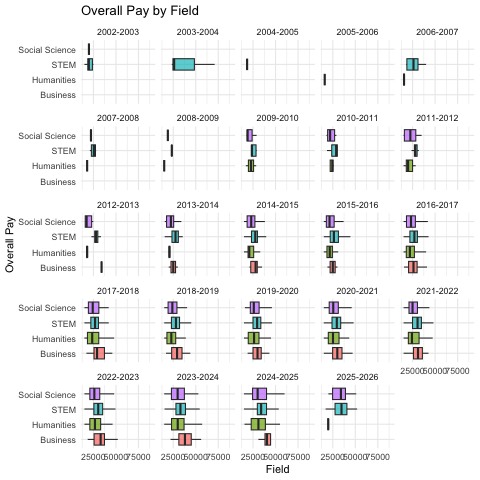

In [102]:
%%R

ggplot(df, aes(x = `Overall Pay`, y = Field, fill = Field)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.7) + 
  theme_minimal() +
  labs(title = "Overall Pay by Field",
       x = "Field", 
       y = "Overall Pay") +
    facet_wrap(~`Academic Year`) +
  theme(legend.position = "none")

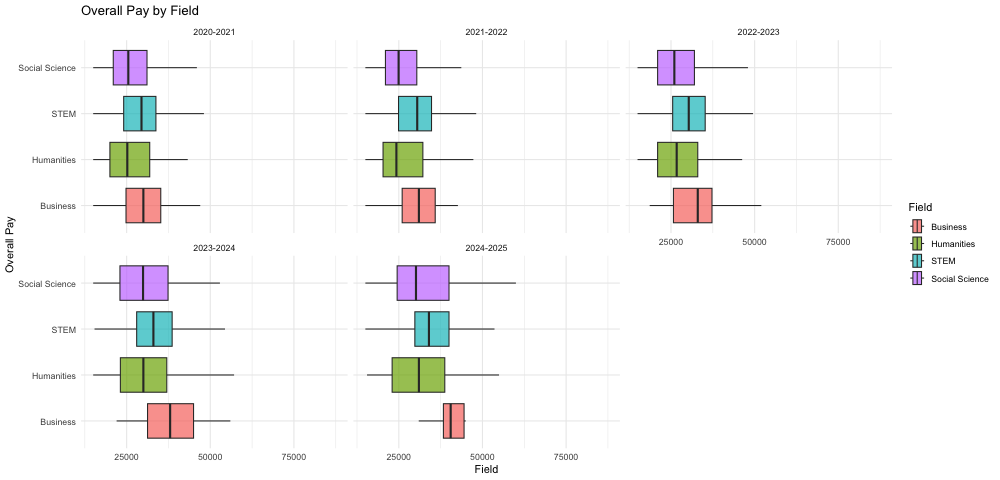

In [103]:
%%R -w 1000


df_filtered <- df[df$`Academic Year` %in% c("2020-2021", "2021-2022", "2022-2023", "2023-2024", "2024-2025"), ]


df_filtered$`Academic Year` <- factor(df_filtered$`Academic Year`, 
                                      levels = c("2020-2021", "2021-2022", "2022-2023", "2023-2024", "2024-2025"))


ggplot(df_filtered, aes(x = `Overall Pay`, y = Field, fill = Field)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.7) + 
  theme_minimal() +
  labs(title = "Overall Pay by Field",
       x = "Field", 
       y = "Overall Pay") +
  facet_wrap(~`Academic Year`) +
  theme_minimal()

`summarise()` has grouped output by 'Academic Year'. You can override using the
`.groups` argument.


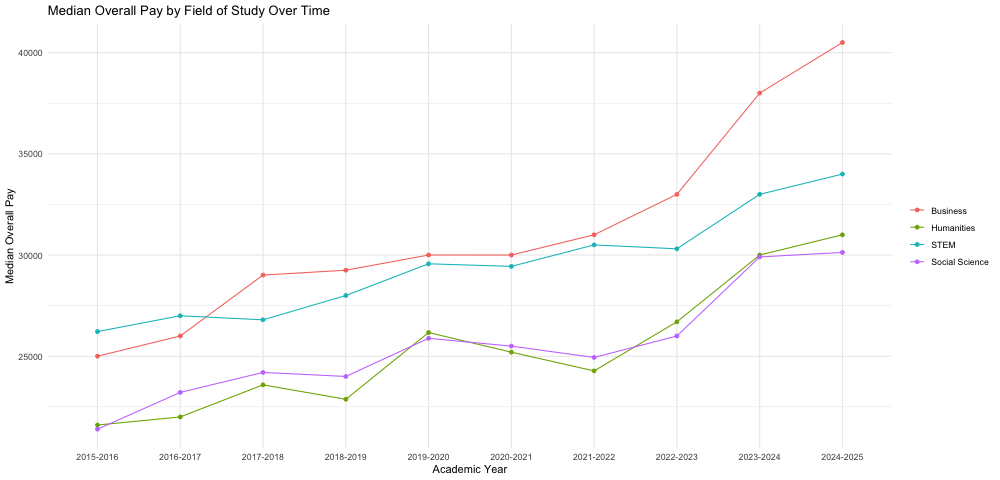

In [104]:
%%R -w1000

# Adjust the 'Academic Year' factor to include years before 2020 (e.g., 2015-2016, 2016-2017, etc.)
df$`Academic Year` <- factor(df$`Academic Year`, 
                             levels = c("2015-2016", "2016-2017", "2017-2018", "2018-2019", "2019-2020", 
                                        "2020-2021", "2021-2022", "2022-2023", "2023-2024", "2024-2025"))

# Remove rows with NA in 'Academic Year' or 'Overall Pay'
library(dplyr)
df_median <- df %>%
  filter(!is.na(`Academic Year`) & !is.na(`Overall Pay`)) %>%  # Remove rows with NA in either 'Academic Year' or 'Overall Pay'
  group_by(`Academic Year`, Field) %>%
  summarise(median_pay = median(`Overall Pay`, na.rm = TRUE))

# Plotting the line chart with the median pay for each field
ggplot(df_median, aes(x = `Academic Year`, y = median_pay, color = Field, group = Field)) +
  geom_line() +  # Line for each field
  geom_point() +  # Optional: Add points for clarity
  theme_minimal() +
  labs(title = "Median Overall Pay by Field of Study Over Time",
       x = "Academic Year", 
       y = "Median Overall Pay") +
  theme(legend.title = element_blank()) +
  scale_x_discrete(limits = c("2015-2016", "2016-2017", "2017-2018", "2018-2019", "2019-2020", 
                             "2020-2021", "2021-2022", "2022-2023", "2023-2024", "2024-2025"))
